# Hamming weight and Pearson Correlation

This notebook demonstrates how to guess a floating number using Hamming Weight model.

We generate a random secret floating number. Then we use hamming weight model to guess the number.

In [1]:
import pathlib
TEST_RESULT_DIR = './results'

pathlib.Path(TEST_RESULT_DIR).mkdir(parents=True, exist_ok=True) 

In [2]:
import sys
sys.path.append("../")

from pybatina.weight_recovery import *
from pybatina.utils import *

In [3]:
import numpy as np

mantissa_nbits = 12
guess_range=(-5.0, 5.0)
# the number of guess values in the guess range
secret_number = np.random.uniform(guess_range[0], guess_range[1]) 
secret_number = 0.25384521484375
secret_number = int_to_float(float_to_int(secret_number))

print('secret_number =', secret_number)

secret_number = 0.25384521484375


## Receover the weight number in step-by-step

### Correlation of mantissa

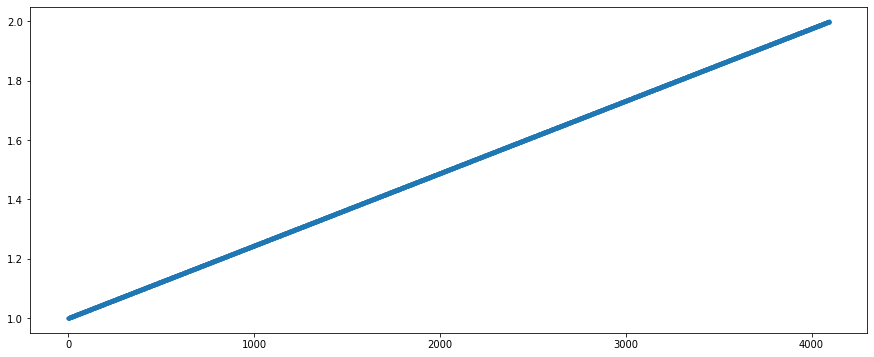

In [4]:
guess_numbers = build_guess_values(component='mantissa', mantissa_nbits=mantissa_nbits, guess_range=guess_range)
known_inputs = build_input_values(mantissa_nbits=mantissa_nbits, component='mantissa')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)

In [5]:
%%time
mantisa_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 13 s, sys: 410 ms, total: 13.4 s
Wall time: 14.1 s


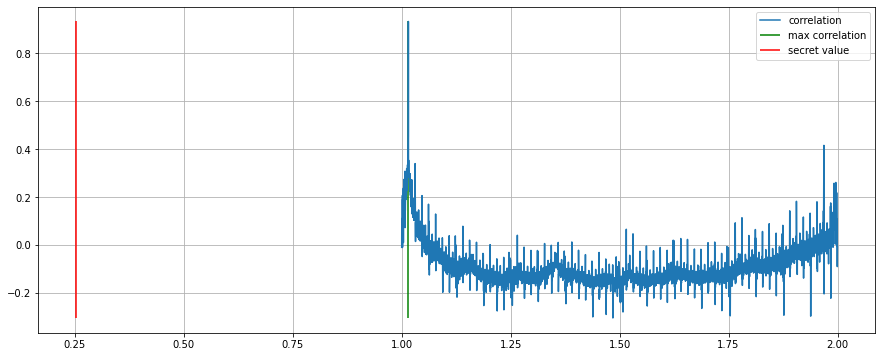

In [6]:
ax = mantisa_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(mantisa_corr.idxmax(), mantisa_corr.min(), mantisa_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, mantisa_corr.min(), mantisa_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [7]:
mantisa_corr.sort_values(ascending=False).iloc[:10]

1.015381    0.933338
1.015137    0.457310
1.968750    0.415813
1.014893    0.391732
1.014648    0.376193
1.015869    0.354056
1.014404    0.350040
1.030762    0.339713
1.013428    0.334637
1.013916    0.326543
dtype: float64

### Correlation exponent

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
../pybatina/weight_recovery.py:37: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:37: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]


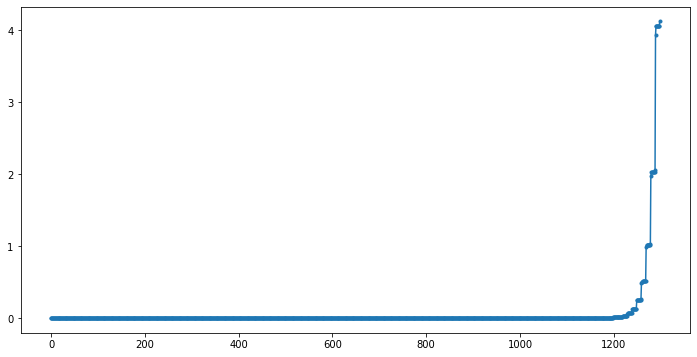

In [8]:
known_inputs = build_input_values(component='exponent')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
guess_numbers = build_guess_values(component='exponent', numbers=mantisa_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='.')

In [9]:
%%time
mantisa_exp_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


CPU times: user 475 ms, sys: 16 ms, total: 491 ms
Wall time: 495 ms


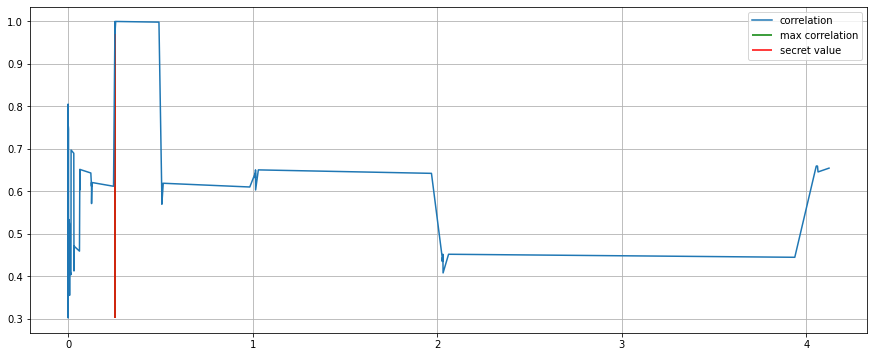

In [10]:
ax = mantisa_exp_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(mantisa_exp_corr.idxmax(), mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [11]:
mantisa_exp_corr.sort_values(ascending=False).iloc[:10]

0.257690    1.000000
0.253845    1.000000
0.253357    0.998441
0.253601    0.998441
0.253723    0.998441
0.492188    0.998441
0.253784    0.998441
0.253662    0.993547
0.253479    0.993547
0.253967    0.972738
dtype: float64

### Correlation sign

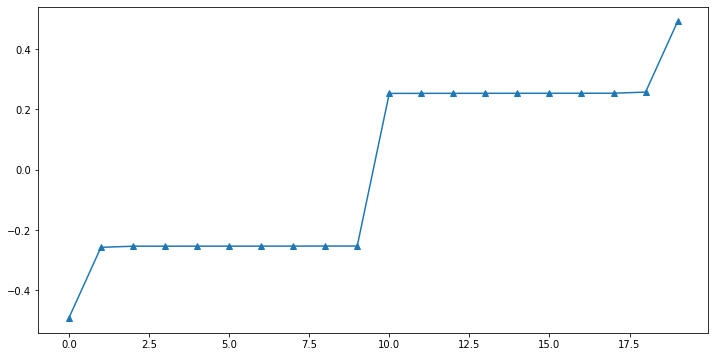

In [12]:
guess_numbers = build_guess_values(component='sign', numbers=mantisa_exp_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
known_inputs = build_input_values(component='sign')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='^')

In [13]:
%%time
full_number_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 28.5 ms, sys: 21 µs, total: 28.5 ms
Wall time: 27.7 ms


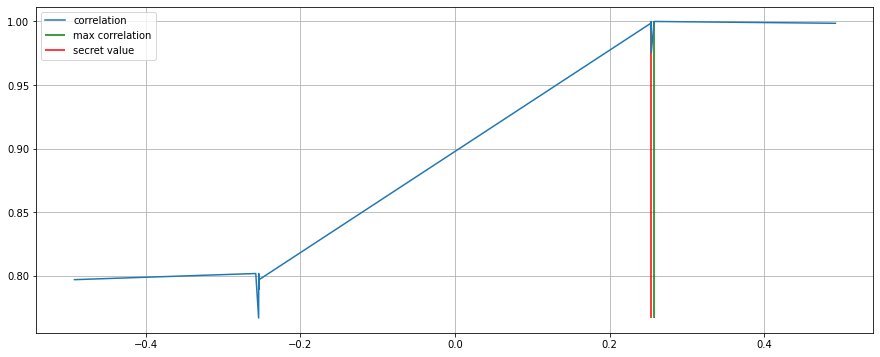

In [14]:
ax = full_number_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(full_number_corr.idxmax(), full_number_corr.min(), full_number_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

In [15]:
print('Secret value = %f' % secret_number)
full_number_corr.sort_values(ascending=False).iloc[:10]

Secret value = 0.253845


0.257690    1.000000
0.253845    1.000000
0.253357    0.998582
0.253601    0.998582
0.253723    0.998582
0.492188    0.998582
0.253784    0.998582
0.253479    0.994151
0.253662    0.994151
0.253967    0.975434
dtype: float64

## Recover a secret number with helper function

In [16]:
%%time
from weight_recovery_helper import *
full_number_corr = batina_recover_weight(secret_number=secret_number, 
                                         guess_range=guess_range,
                                         mantissa_nbits=mantissa_nbits,
                                         noise=None)
ax = full_number_corr.sort_index().plot(figsize=(15,6), label='correlation')
ax.vlines(full_number_corr.idxmax(), full_number_corr.min(), full_number_corr.max(), color='green', label='max correlation')
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red', label='secret value')
ax.legend()
ax.grid()

KeyboardInterrupt: 

In [17]:
print('Secret value = %f' % secret_number)
full_number_corr.sort_values(ascending=False).iloc[:10]

Secret value = 0.253845


0.257690    1.000000
0.253845    1.000000
0.253357    0.998582
0.253601    0.998582
0.253723    0.998582
0.492188    0.998582
0.253784    0.998582
0.253479    0.994151
0.253662    0.994151
0.253967    0.975434
dtype: float64

## Recover multiple secret numbers

In [18]:
SECRET_VALUE='secret value'
GUESSED_VALUE = 'guessed value'
CORRELATION='correlation'
df_index = [SECRET_VALUE, GUESSED_VALUE, CORRELATION]

In [19]:
def add_noise_to_signal(signal, snr, freq):
    """
    add noise to the signal
    :param signal: signal
    :param snr: signal to noise ratio 
    :param freq: frequency of noise 
    :return: signal with noise
    """
    sig_max = signal.max()
    sig_min = signal.min()
    return pd.Series(signal).apply(lambda x: x  +
                                   np.average(np.random.normal(0.0, (sig_max-sig_min)/snr, freq)))

In [20]:
precision = 1e-3
n_secret_numbers = 2000
secret_numbers = np.concatenate((
    np.random.uniform(guess_range[0], guess_range[1], int(n_secret_numbers*2/4) ),
    np.random.uniform(guess_range[0]*3e-1, guess_range[1]*3e-1, int(n_secret_numbers*1/4)),
    np.random.uniform(guess_range[0]*1e-1, guess_range[1]*1e-1, int(n_secret_numbers*1/4))
))
np.random.shuffle(secret_numbers)
signal_to_noise_ratio = 0.5
print('secret_numbers.shape = %s' % (str(secret_numbers.shape)))

secret_numbers.shape = (2000,)


## Batina without noise

### load existing DB

In [21]:
# read the existing data
from os import path
try:
    fname = path.join(TEST_RESULT_DIR, 'batina_results-%d.csv' % mantissa_nbits)
    last_df = pd.read_csv(fname, index_col=0)
    print('read results in %s' % fname)
    print('number of weight values', len(last_df[SECRET_VALUE].unique()))
except FileNotFoundError:
    last_df = pd.DataFrame()
    pass

batina_results = last_df

read results in ./results/batina_results-12.csv
number of weight values 2433


### main process

In [22]:
%%time 
for value in secret_numbers:
    try:
        if value in batina_results[SECRET_VALUE].unique():
            continue
    except KeyError:
        pass
    
    s = batina_recover_weight(secret_number=value,
                              guess_range=guess_range,
                              mantissa_nbits=mantissa_nbits)
    s.name = CORRELATION
    df = pd.DataFrame(s).reset_index().rename(columns={'index': GUESSED_VALUE})
    df[SECRET_VALUE] = value
    batina_results = pd.concat([batina_results, df], axis=0, ignore_index=True)

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
../pybatina/weight_recovery.py:37: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:37: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:85: RuntimeWarning: invalid value encountered in multiply
  data=np.vectorize(hamming_weight)(known_inputs.reshape(-1, 1) * guess_numbers))


KeyboardInterrupt: 

### merge and save DB

In [23]:
print('number of weight values', len(batina_results[SECRET_VALUE].unique()))
batina_results.to_csv(fname)
print('save results in %s' % fname)

number of weight values 2581
save results in ./results/batina_results-12.csv


## Batina with noise

### load existing DB

In [24]:
# read the existing data
from os import path
try:
    fname = path.join(TEST_RESULT_DIR, 'noise_batina_results-%d.csv' % mantissa_nbits)
    last_df = pd.read_csv(fname, index_col=0)
    print('read results in %s' % fname)
    print('number of weight values', len(last_df[SECRET_VALUE].unique()))
except FileNotFoundError:
    last_df = pd.DataFrame()
    pass
noise_batina_results = last_df

read results in ./results/noise_batina_results-12.csv
number of weight values 141


### main process

In [25]:
%%time
for value in batina_results.index:
    try:
        if value in noise_batina_results[SECRET_VALUE].unique():
            continue
    except KeyError:
        pass
    s = batina_recover_weight(secret_number=value, 
                              guess_range=guess_range,
                              mantissa_nbits=mantissa_nbits,
                              noise=(add_noise_to_signal, signal_to_noise_ratio, 200))
    s.name = CORRELATION
    df = pd.DataFrame(s).reset_index().rename(columns={'index': GUESSED_VALUE})
    df[SECRET_VALUE] = value
    noise_batina_results = pd.concat([noise_batina_results, df], axis=0, ignore_index=True)

KeyboardInterrupt: 

### merge and save DB

In [26]:
print('number of weight values', len(noise_batina_results[SECRET_VALUE].unique()))
noise_batina_results.to_csv(fname)
print('save results in %s' % fname)

number of weight values 3823
save results in ./results/noise_batina_results-12.csv


### Statistics

In [27]:
ERROR = 'error'
def statistics(df):
    dft = df[[SECRET_VALUE, GUESSED_VALUE, CORRELATION]].astype(dtype=np.float64)
    dft[ERROR] = np.abs((dft[GUESSED_VALUE] - dft[SECRET_VALUE])/dft[SECRET_VALUE])    
    best_corr = dft.loc[dft.groupby(SECRET_VALUE)[CORRELATION].idxmax()]
    best_err = dft.loc[dft.groupby(SECRET_VALUE)[ERROR].idxmin()]
    return best_corr.T, best_err.T

In [28]:
batina_best_corr, batina_best_err = statistics(batina_results)
noise_batina_best_corr, noise_batina_best_err = statistics(noise_batina_results)

In [29]:
study_score = batina_best_corr
(study_score.T[ERROR] < 1e-3).value_counts()

True     2430
False     151
Name: error, dtype: int64

In [30]:
error_sorted = study_score.T.sort_values(ERROR, ascending=False)
error_sorted[:10]

,secret value,guessed value,correlation,error
2750,0.253887,0.497559,0.948999,0.959763
3900,-0.500239,-0.979858,1.000000,0.958780
19120,0.251873,0.479492,0.998682,0.903706
17860,-2.375232,-3.804199,1.000000,0.601612
22550,-2.390632,-3.824707,1.000000,0.599873
25750,0.156489,0.244690,0.994930,0.563624
21660,2.507635,3.909180,0.975918,0.558911
7540,-2.500920,-3.770508,0.992462,0.507648
15990,-0.156362,-0.229828,0.998339,0.469843
4040,0.173816,0.249237,0.962693,0.433912


In [31]:
error_sorted.iloc[0][SECRET_VALUE]

0.2538871328335968

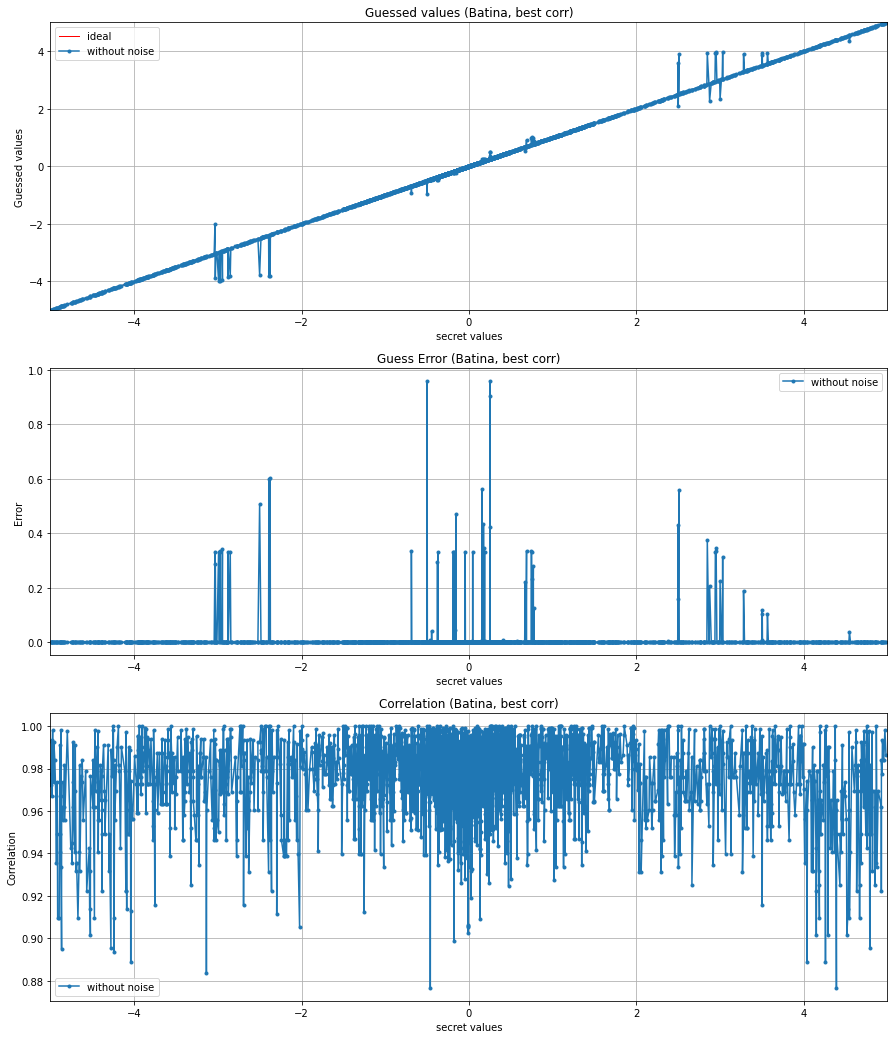

In [32]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
df = batina_best_corr.T
ax[0].plot(guess_range, guess_range, linewidth=1, label='ideal', color='red')
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
ax[0].set_ylim(np.min(guess_range), np.max(guess_range))

ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (Batina, best corr)')

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (Batina, best corr)')

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (Batina, best corr)')

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')
    a.set_xlim(np.min(guess_range), np.max(guess_range))

from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'hw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f")))
plt.savefig(fname)
plt.show()

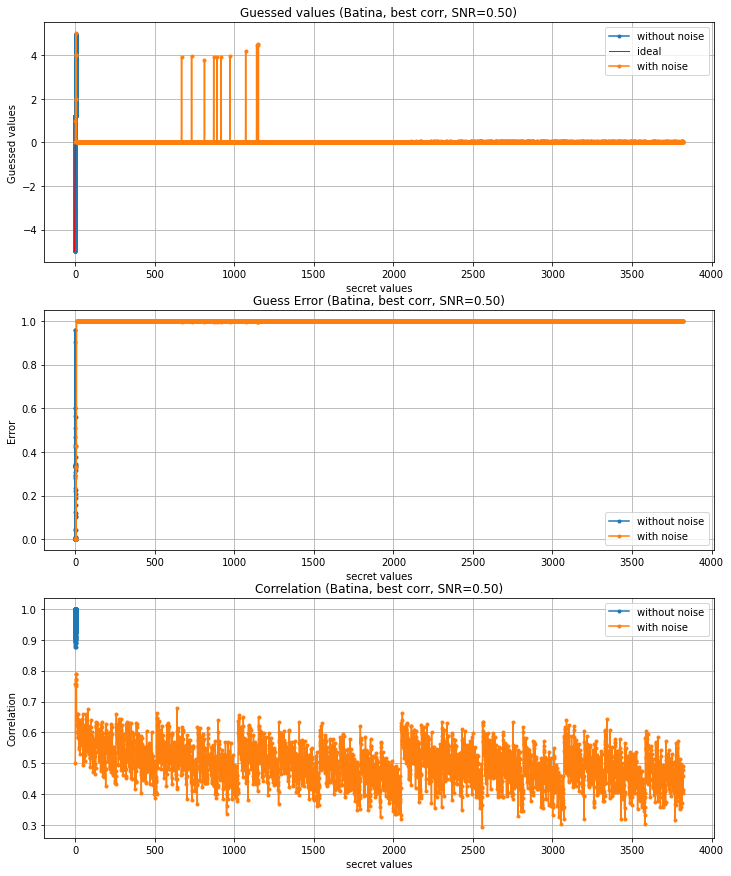

In [33]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = batina_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
df = noise_batina_best_corr.T
ax[0].plot(guess_range, guess_range, linewidth=1, label='ideal', color='red')
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='with noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='with noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='with noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'nhw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f")))
plt.savefig(fname)
plt.show()